# Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram

# Load the data

In [ ]:
df=pd.read_csv('/content/google_reviews_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5455 non-null   object 
 1   Category 1   5455 non-null   float64
 2   Category 2   5455 non-null   float64
 3   Category 3   5455 non-null   float64
 4   Category 4   5455 non-null   float64
 5   Category 5   5455 non-null   float64
 6   Category 6   5455 non-null   float64
 7   Category 7   5455 non-null   float64
 8   Category 8   5455 non-null   float64
 9   Category 9   5455 non-null   float64
 10  Category 10  5455 non-null   float64
 11  Category 11  5455 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5455 non-null   float64
 14  Category 14  5455 non-null   float64
 15  Category 15  5455 non-null   float64
 16  Category 16  5455 non-null   float64
 17  Category 17  5455 non-null   float64
 18  Category 18  5455 non-null   float64
 19  Category 19

In [ ]:
df['Category 11'] = df['Category 11'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5455 non-null   object 
 1   Category 1   5455 non-null   float64
 2   Category 2   5455 non-null   float64
 3   Category 3   5455 non-null   float64
 4   Category 4   5455 non-null   float64
 5   Category 5   5455 non-null   float64
 6   Category 6   5455 non-null   float64
 7   Category 7   5455 non-null   float64
 8   Category 8   5455 non-null   float64
 9   Category 9   5455 non-null   float64
 10  Category 10  5455 non-null   float64
 11  Category 11  5455 non-null   float64
 12  Category 12  5455 non-null   float64
 13  Category 13  5455 non-null   float64
 14  Category 14  5455 non-null   float64
 15  Category 15  5455 non-null   float64
 16  Category 16  5455 non-null   float64
 17  Category 17  5455 non-null   float64
 18  Category 18  5455 non-null   float64
 19  Category 19

Drop User Column

In [ ]:
df.drop(['User'], axis = 1, inplace = True)

In [ ]:
print(df.columns)

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')


In [ ]:
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Kmeans Clustering

In [ ]:
import warnings

warnings.simplefilter(action='ignore')

In [ ]:
#Elbow Method
inertia = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)


<function matplotlib.pyplot.show(close=None, block=None)>

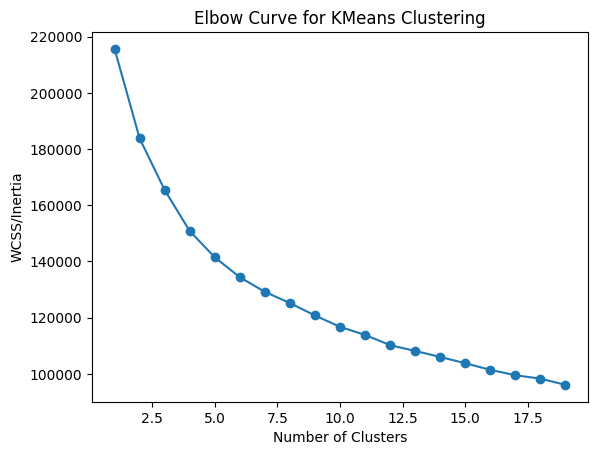

In [ ]:
plt.plot(range(1,20), inertia, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS/Inertia")
plt.title("Elbow Curve for KMeans Clustering")
plt.show

In [ ]:
kmeans = KMeans(n_clusters = 15, random_state = 123)
kmeans.fit(df)
df['Cluster']=kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(round(silhouette_score(df, kmeans.fit_predict(df)),2))

0.27


In [ ]:
cluster_behavior =df.groupby('Cluster').mean()


In [ ]:
print(cluster_behavior)


         Category 1  Category 2  Category 3  Category 4  Category 5  \
Cluster                                                               
0          1.254264    1.460271    1.631168    2.210389    2.268579   
1          1.332444    4.590250    4.265000    4.133056    4.627944   
2          0.752640    0.928652    1.643764    1.599242    1.584382   
3          2.266358    3.797778    3.620494    3.146698    2.615895   
4          1.520057    2.115604    3.181075    4.535283    4.240774   
5          1.139410    4.989292    2.191651    2.058797    2.211698   
6          1.209735    1.668907    2.895573    3.572945    4.412152   
7          1.459943    1.675460    2.010172    1.988563    1.985575   
8          0.367838    0.908649    1.475946    1.478514    1.603311   
9          1.900766    2.143694    2.685225    3.674234    3.649414   
10         2.590812    2.569594    2.402219    1.991469    1.851438   
11         1.150134    1.304919    2.014005    2.294301    2.624220   
12    

Hierarchical Clustering

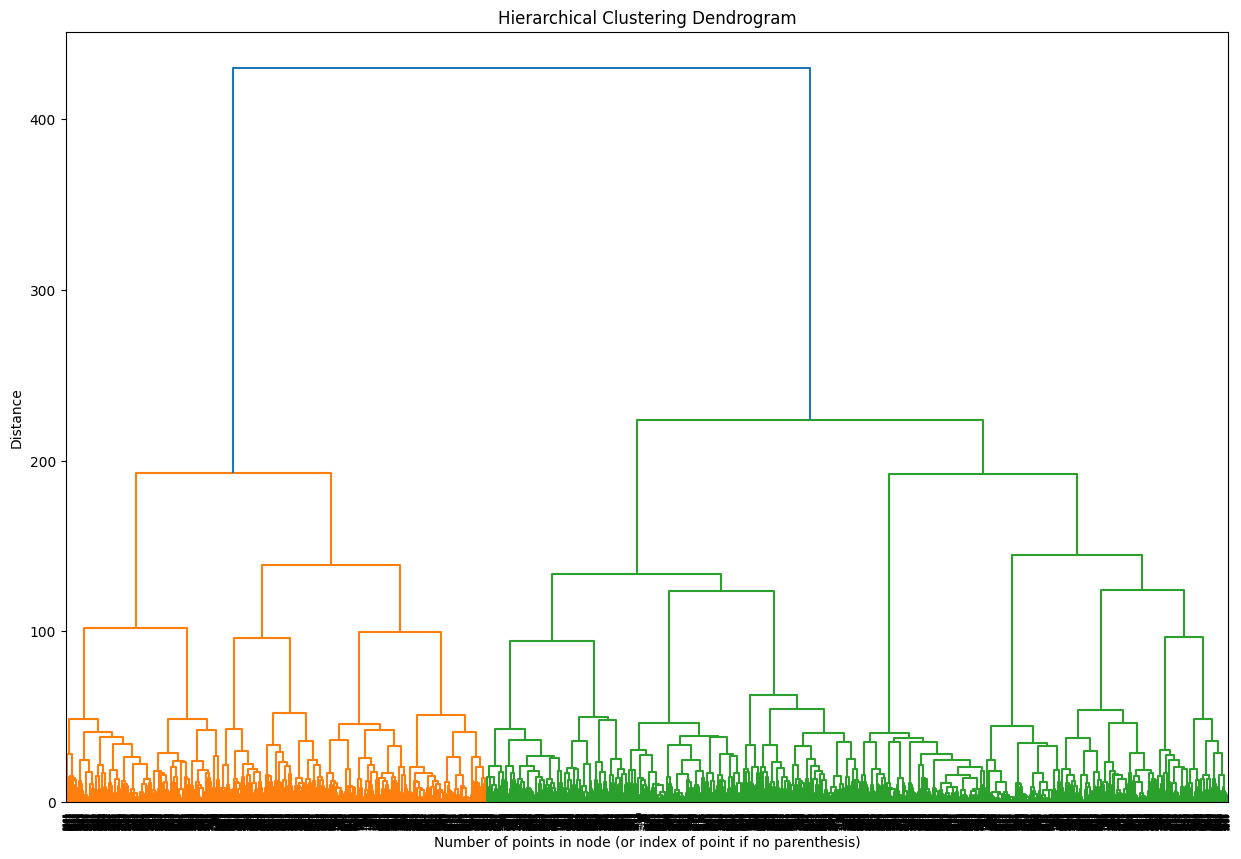

In [ ]:
# Perform hierarchical clustering (linkage calculation)
distance_matrix = linkage(df, method='ward')  # Ward's method for minimizing variance

# Generate the dendrogram
plt.figure(figsize=(15, 10))  # Adjust figure size as desired
dendrogram(distance_matrix, labels=np.arange(len(df)))  # Labels for data points
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df)
df['Cluster']=agg.labels_

In [ ]:
print(round(silhouette_score(df, agg.fit_predict(df)),2))

0.13


In [ ]:
cluster_behavior = df.groupby('Cluster').mean()


In [ ]:
print(cluster_behavior)


         Category 1  Category 2  Category 3  Category 4  Category 5  \
Cluster                                                               
0          1.734995    2.003623    2.269489    2.525997    2.752095   
1          1.084620    2.221550    1.793616    1.977800    2.058595   
2          1.505438    2.772067    3.419943    3.906355    4.076173   

         Category 6  Category 7  Category 8  Category 9  Category 10  ...  \
Cluster                                                               ...   
0          2.864155    3.344135    2.603502    3.224195     2.628942  ...   
1          2.312792    3.619095    2.905229    3.717435     3.543041  ...   
2          3.497278    3.098087    2.113428    2.436116     2.366213  ...   

         Category 15  Category 16  Category 17  Category 18  Category 19  \
Cluster                                                                    
0           2.323801     1.075142     1.096888     1.111984     1.384008   
1           2.849042     1.356